In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
import django
import os

os.environ['DJANGO_SETTINGS_MODULE'] = 'dashboard.settings'
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

In [3]:
from precinct.models import PrecinctMap, PrecinctEdition

In [4]:
edition = PrecinctEdition.objects.get(year=2022)
maps = PrecinctMap.objects.get_maps_for(edition, county_codes='060')

In [5]:
maps

,pid,precinct_short_name,precinct_name,county_code,county_fips,county_name,geometry
0,2655,MP01,MP01,060,121,FULTON,"POLYGON ((-84.41879 34.07842, -84.41868 34.080..."
1,2656,RW02,RW02,060,121,FULTON,"POLYGON ((-84.39727 34.02854, -84.39714 34.028..."
2,2657,SS26,SS26,060,121,FULTON,"POLYGON ((-84.35387 33.97499, -84.35381 33.974..."
3,2658,SS16,SS16,060,121,FULTON,"POLYGON ((-84.40388 33.94268, -84.40403 33.942..."
4,2659,JC09,JC09,060,121,FULTON,"POLYGON ((-84.21046 34.04795, -84.21064 34.047..."
...,...,...,...,...,...,...,...
438,3093,UC02A,UC02A,060,121,FULTON,"MULTIPOLYGON (((-84.60281 33.63001, -84.60244 ..."
439,3094,UC02D,UC02D,060,121,FULTON,"POLYGON ((-84.56053 33.59568, -84.56039 33.595..."
440,3095,UC02C,UC02C,060,121,FULTON,"POLYGON ((-84.54963 33.59590, -84.54978 33.595..."
441,3096,SC08I,SC08I,060,121,FULTON,"POLYGON ((-84.51908 33.59579, -84.51908 33.595..."


In [6]:
import plotly.graph_objects as go
import plotly.express as px

In [7]:
import json

In [8]:
gj = json.loads(maps.geometry.to_json())

In [9]:
maps1 = maps.head(20)
maps1

,pid,precinct_short_name,precinct_name,county_code,county_fips,county_name,geometry
0,2655,MP01,MP01,060,121,FULTON,"POLYGON ((-84.41879 34.07842, -84.41868 34.080..."
1,2656,RW02,RW02,060,121,FULTON,"POLYGON ((-84.39727 34.02854, -84.39714 34.028..."
2,2657,SS26,SS26,060,121,FULTON,"POLYGON ((-84.35387 33.97499, -84.35381 33.974..."
3,2658,SS16,SS16,060,121,FULTON,"POLYGON ((-84.40388 33.94268, -84.40403 33.942..."
4,2659,JC09,JC09,060,121,FULTON,"POLYGON ((-84.21046 34.04795, -84.21064 34.047..."
5,2660,RW01,RW01,060,121,FULTON,"POLYGON ((-84.40304 34.06230, -84.40288 34.062..."
6,2661,JC08,JC08,060,121,FULTON,"POLYGON ((-84.19004 34.05479, -84.19005 34.054..."
7,2662,RW08,RW08,060,121,FULTON,"POLYGON ((-84.34354 34.03653, -84.34360 34.036..."
8,2663,JC05,JC05,060,121,FULTON,"POLYGON ((-84.20322 34.06888, -84.19996 34.068..."
9,2664,JC07,JC07,060,121,FULTON,"POLYGON ((-84.17754 34.04789, -84.17753 34.047..."


In [10]:
center = maps.to_crs(crs='epsg:3035').centroid.to_crs('epsg:4326').iloc[0]

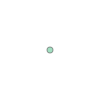

In [11]:
center

In [12]:
maps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
maps1.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"pid": 2655, "precinct_short_name": "MP01", "precinct_name": "MP01", "county_code": "060", "county_fips": "121", "county_name": "FULTON"}, "geometry": {"type": "Polygon", "coordinates": [[[-84.4187926202575, 34.0784194450088], [-84.4186788640086, 34.0809345351967], [-84.4186267660538, 34.082022547349], [-84.4185606642164, 34.085910557723], [-84.4185267320381, 34.0881152900466], [-84.4185038639314, 34.0895394017777], [-84.4139116899208, 34.0895539496285], [-84.4139324924857, 34.0859159742804], [-84.4098772053521, 34.0859204950301], [-84.4053799988973, 34.085810596264], [-84.4053887935122, 34.0853549444096], [-84.4054488747116, 34.0820488615116], [-84.4055959727189, 34.0782715819333], [-84.410691270013, 34.0783437373921], [-84.410719973485, 34.0782760084691], [-84.4108085152159, 34.0780570152597], [-84.4108446216712, 34.0779796532524], [-84.4108865155291, 34.0779046834167], [-84.4109366606884, 34.07

In [14]:
fig = px.choropleth_mapbox(
    maps1[['pid', 'precinct_short_name']],
    geojson=json.loads(maps1[['pid', 'precinct_short_name', 'geometry']].to_json()),
    color='precinct_short_name',
    center = {"lat": center.y, "lon": center.x},
    locations='pid',
    featureidkey="properties.pid",
    opacity=1,
    mapbox_style="open-street-map", zoom=12,
)


In [15]:
fig.write_html('../workproducts/fulton.html')

In [16]:
from sen_map.models import SenMap
from cng_map.models import CngMap
from hse_map.models import HseMap

In [17]:
sm = SenMap.objects.all().first()
cm = CngMap.objects.all().first()
hm  = HseMap.objects.all().first()

In [18]:
import geopandas as gpd

In [22]:
gpd.GeoSeries.from_wkb([cm.geometry_wkb])

0    POLYGON ((-2006914.828 6211280.309, -2006931.0...
dtype: geometry